In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
tf.__version__

'2.15.0'

## **Perform Data Augmentation and Pre-processing on split dataset**

In [ ]:
import tensorflow as tf
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
train_dir = '/content/drive/My Drive/PreparedData/Train'
test_dir = '/content/drive/My Drive/PreparedData/Test'

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed =42)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  seed=42)


Found 4232 images belonging to 2 classes.
Found 904 images belonging to 2 classes.


## **Define and Train model**

In [ ]:
import timeit
start = timeit.default_timer()

# Define the MobileNetV2 model as the base model
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Combine the base model with the new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.2)(x)
outputs = Dense(units=2, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
LEARNING_RATE = 0.001
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator)

stop = timeit.default_timer()
print('Training Runtime (seconds): ', stop - start)

9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/30
133/133 [==============================] - 2456s 18s/step - loss: 0.3617 - accuracy: 0.8325 - val_loss: 0.2224 - val_accuracy: 0.9237
Epoch 2/30
133/133 [==============================] - 60s 448ms/step - loss: 0.2006 - accuracy: 0.9249 - val_loss: 0.2153 - val_accuracy: 0.9336
Epoch 3/30
133/133 [==============================] - 60s 447ms/step - loss: 0.1826 - accuracy: 0.9277 - val_loss: 0.2028 - val_accuracy: 0.9314
Epoch 4/30
133/133 [==============================] - 59s 447ms/step - loss: 0.1807 - accuracy: 0.9345 - val_loss: 0.1945 - val_accuracy: 0.9369
Epoch 5/30
133/133 [==============================] - 59s 445ms/step - loss: 0.1705 - accuracy: 0.9379 - val_loss: 0.1924 - val_accuracy: 0.9392
Epoch 6/30
133/133 [==============================] - 59s 447ms/step - loss: 0.1668 - accuracy: 0.9383 - val_loss: 0.1849 - val_accuracy: 0.9369
Epoch 7/30
133/133 [==============================] - 59s 444ms/ste

## **Evaluate model performance**

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

29/29 [==============================] - 3s 109ms/step - loss: 0.1748 - accuracy: 0.9358
Test accuracy: 0.9358407258987427


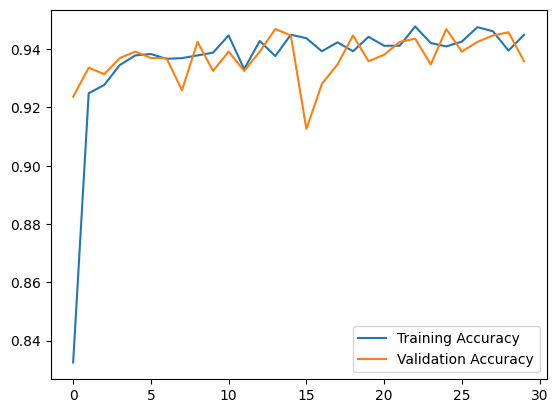

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

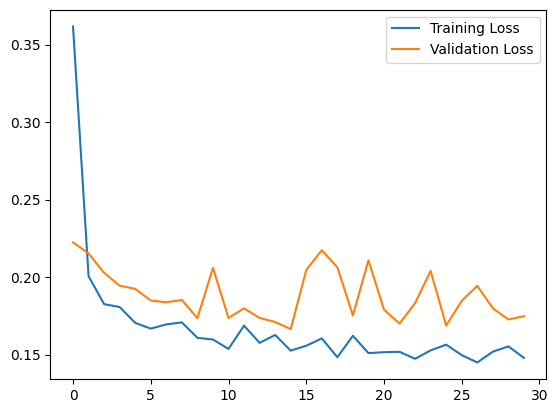

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## **Test the trained model on individual images**

1/1 [==============================] - 1s 893ms/step


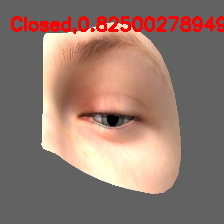

1/1 [==============================] - 0s 24ms/step


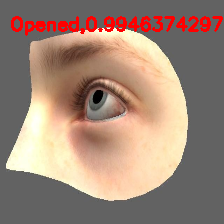

1/1 [==============================] - 0s 23ms/step


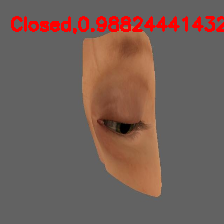

1/1 [==============================] - 0s 23ms/step


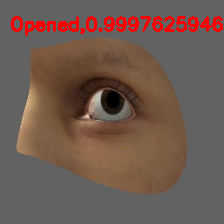

1/1 [==============================] - 0s 23ms/step


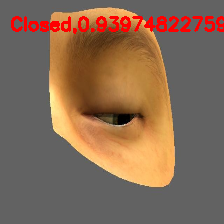

1/1 [==============================] - 0s 23ms/step


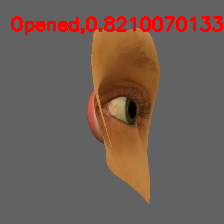

1/1 [==============================] - 0s 24ms/step


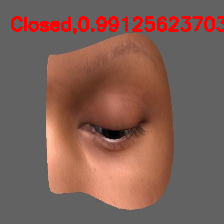

1/1 [==============================] - 0s 24ms/step


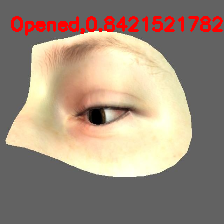

1/1 [==============================] - 0s 23ms/step


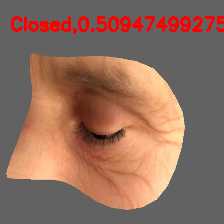

1/1 [==============================] - 0s 23ms/step


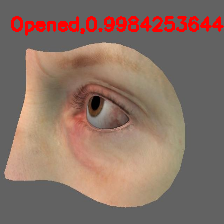

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

class_names = ['Closed','Opened']

image_dirs = ['/content/drive/My Drive/PreparedData/Val/Closed/408.jpg',
              '/content/drive/My Drive/PreparedData/Val/Opened/621.jpg',
              '/content/drive/My Drive/PreparedData/Val/Closed/632.jpg',
              '/content/drive/My Drive/PreparedData/Val/Opened/4232.jpg',
              '/content/drive/My Drive/PreparedData/Val/Closed/4147.jpg',
              '/content/drive/My Drive/PreparedData/Val/Opened/4795.jpg',
              '/content/drive/My Drive/PreparedData/Val/Closed/4390.jpg',
              '/content/drive/My Drive/PreparedData/Val/Opened/5306.jpg',
              '/content/drive/My Drive/PreparedData/Val/Closed/4755.jpg',
              '/content/drive/My Drive/PreparedData/Val/Opened/5879.jpg'
              ]

for image_dir in image_dirs:

  test_img = None
  img_array = None
  prediction = None
  predicted_class = None
  predicted_prob = None

  test_img = cv2.imread(image_dir)
  test_img = cv2.resize(test_img, (224, 224))
  img_array = np.expand_dims(test_img, axis=0)
  img_array = img_array.astype('float32') / 255.

  # Make a prediction using the model
  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction)]
  predicted_prob = np.max(prediction)

  cv2.putText(test_img, f'{predicted_class},{predicted_prob}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
  cv2_imshow(test_img)

In [ ]:
model.save('/content/drive/My Drive/PreparedData/eyes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        